Solution w= [[4.09879483 2.99709642]]
Đạo hàm có thể sử dụng
Solution for w[2,1] = [[4.11357328 2.96872395]] with iterations =  71
Solution for w[6,4] = [[4.09777791 3.00755742]] with iterations =  4


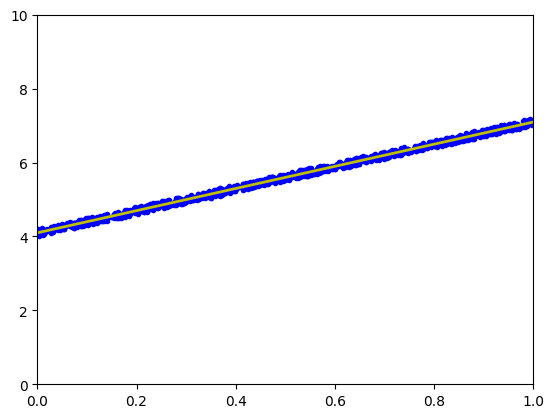

In [1]:
# Ví dụ tạo đường của solution 4 + 3x

from __future__ import division, print_function, unicode_literals
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
np.random.seed(2)

X = np.random.rand(1000,1)
y = 4 + 3*X + .2*np.random.rand(1000,1)

## Building Xbar
one = np.ones((X.shape[0], 1))
# print(one)
Xbar = np.concatenate((one, X), axis=1)
A = np.dot(Xbar.T, Xbar)
b = np.dot(Xbar.T, y)
w_lr = np.dot(np.linalg.pinv(A), b)
print('Solution w=', w_lr.T)

## Matplotlib
w = w_lr
w0 = w[0][0]
w1 = w[1][0]
x0 = np.linspace(0,1,2, endpoint = True)
y0 = w0 + w1*x0

# Pyplot
plt.plot(X.T, y.T, 'b.')     # data
plt.plot(x0, y0, 'y', linewidth = 2)   # the fitting line
plt.axis([0, 1, 0, 10])

# Đường thẳng tìm được có dạng y ~ 4 + 2.997x
# Bắt đầu khởi động Gradient Descent để tính toán hàm mất mát cho hàm Linear Regression
def grad(w) :
    N = Xbar.shape[0]
    return 1/N *Xbar.T.dot(Xbar.dot(w) - y) ##Đạo hàm dựa theo bài toán linear regression

def cost (w) :
    N = Xbar.shape[0]
    return 1/(2*N)* np.linalg.norm(y - Xbar.dot(w), 2) ** 2

# Kiểm tra tính chính xác của đạo hàm bằng cách tính numberical gradient
def numberical_grad(w, cost) :
    eps = 1e-4
    g = np.zeros_like(w)
    for i in range(len(w)) :
        w_p = w.copy()
        w_n = w.copy()
        w_p[i] += eps
        w_n[i] -= eps
        g[i] = (cost(w_p) - cost(w_n))/(2*eps)
    return g
def check_grad(w, cost, grad) :
    w = np.random.rand(w.shape[0], w.shape[1])
    grad1 = grad(w)
    grad2 = numberical_grad(w, cost)
    return 'Đạo hàm có thể sử dụng' if np.linalg.norm(grad1 - grad2) < 1e-6 else 'Đạo hàm không thể sử dụng'

print(check_grad(np.random.rand(2,1), cost,grad))

# Kiểm tra xong, đã ổn, giờ tính toán :D
def cal_gd(w_init, grad, eta) :
    w = [w_init]
    for it in range(150) :
        w_new = w[-1] - eta*grad(w[-1])
        if np.linalg.norm(grad(w_new))/len(w_new) < 1e-3 :
            break
        w.append(w_new)
    return (w, it)

w_init1 = np.array([[2], [1]])
w_init2 = np.array([[6], [4]])
(w1, init1) = cal_gd(w_init1, grad, .7)
(w2, init2) = cal_gd(w_init2, grad, .7)
print('Solution for w[2,1] =', w1[-1].T, 'with iterations = ', init1+1)
print('Solution for w[6,4] =', w2[-1].T, 'with iterations = ', init2+1)